# Introdução ao Machine Learning

## Objetivos

- Compreender os conceitos fundamentais de Machine Learning
- Distinguir entre diferentes tipos de aprendizado
- Visualizar exemplos práticos com dados simples

## Pré-requisitos

- Conhecimento básico de Python
- Conceitos básicos de estatística


In [2]:
# Importações necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans

# Configurar seeds para reprodutibilidade
np.random.seed(42)

# Configurar estilo dos gráficos
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. O que é Machine Learning?

Machine Learning (Aprendizado de Máquina) é um campo da inteligência artificial que permite que computadores aprendam e melhorem automaticamente através da experiência, sem serem explicitamente programados para cada tarefa específica.

### Características principais:

- **Automático**: O algoritmo aprende padrões nos dados automaticamente
- **Melhoria contínua**: Performance melhora com mais dados
- **Generalização**: Capaz de fazer previsões em dados nunca vistos antes


## 2. Tipos de Aprendizado de Máquina

### 2.1 Aprendizado Supervisionado

- Aprende com exemplos rotulados (entrada → saída)
- **Regressão**: Prediz valores contínuos
- **Classificação**: Prediz categorias/classes


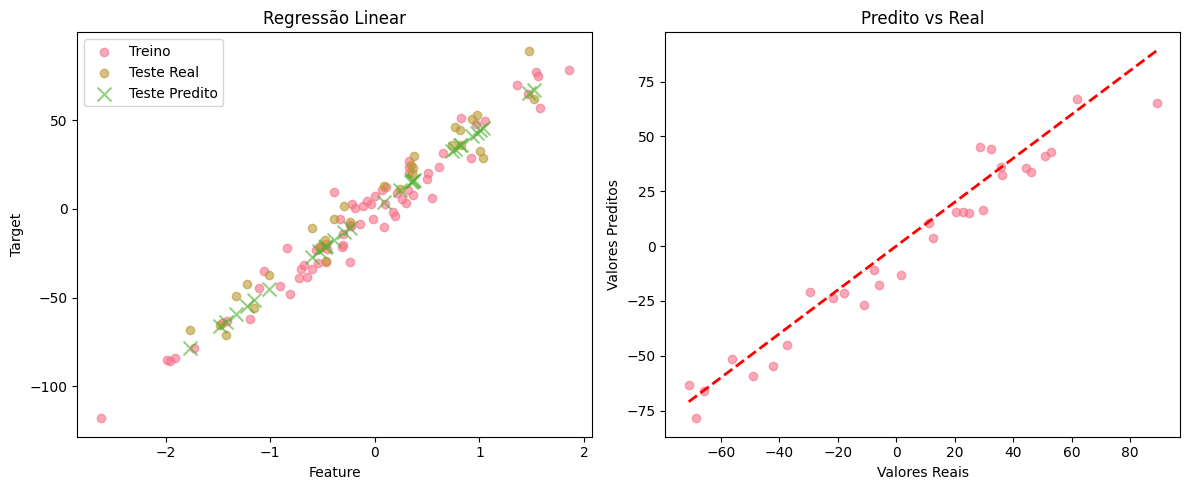

Score R²: 0.941


In [4]:
# Exemplo: Regressão Linear
# Gerando dados sintéticos
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Treinando o modelo
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Fazendo previsões
y_pred = model_reg.predict(X_test)

# Visualizando
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, label="Treino")
plt.scatter(X_test, y_test, alpha=0.6, label="Teste Real")
plt.scatter(X_test, y_pred, alpha=0.6, label="Teste Predito", marker="x", s=100)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Regressão Linear")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Predito vs Real")

plt.tight_layout()
plt.show()

print(f"Score R²: {model_reg.score(X_test, y_test):.3f}")

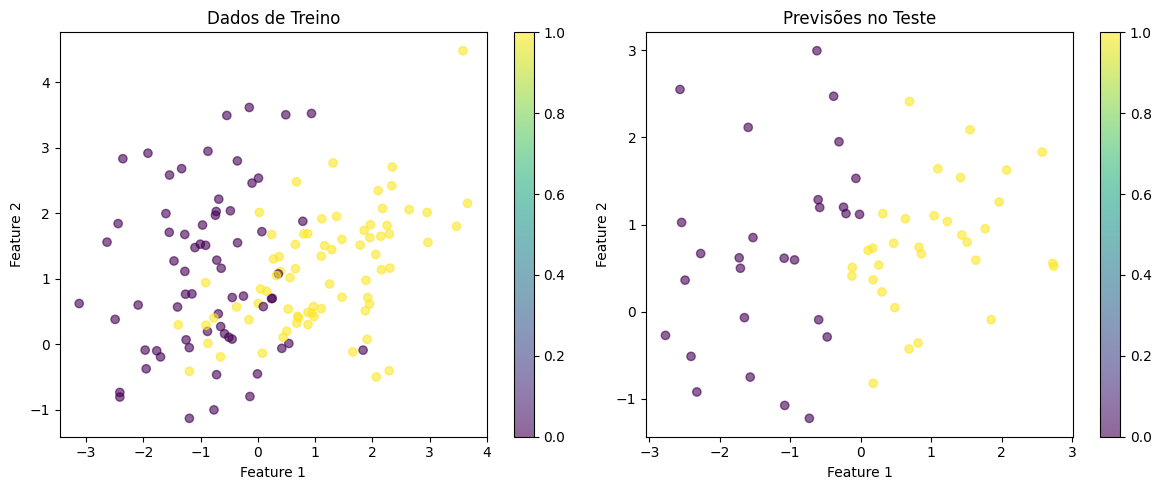

Acurácia: 0.867


In [5]:
# Exemplo: Classificação
# Gerando dados sintéticos
X_clf, y_clf = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42,
)

# Dividindo em treino e teste
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

# Treinando o modelo
model_clf = LogisticRegression()
model_clf.fit(X_train_clf, y_train_clf)

# Fazendo previsões
y_pred_clf = model_clf.predict(X_test_clf)

# Visualizando
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(
    X_train_clf[:, 0], X_train_clf[:, 1], c=y_train_clf, alpha=0.6, cmap="viridis"
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dados de Treino")
plt.colorbar(scatter)

plt.subplot(1, 2, 2)
scatter = plt.scatter(
    X_test_clf[:, 0], X_test_clf[:, 1], c=y_pred_clf, alpha=0.6, cmap="viridis"
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Previsões no Teste")
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

print(f"Acurácia: {model_clf.score(X_test_clf, y_test_clf):.3f}")

### 2.2 Aprendizado Não Supervisionado

- Aprende padrões em dados sem rótulos
- **Clustering**: Agrupa dados similares
- **Redução de dimensionalidade**: Simplifica dados mantendo informação relevante


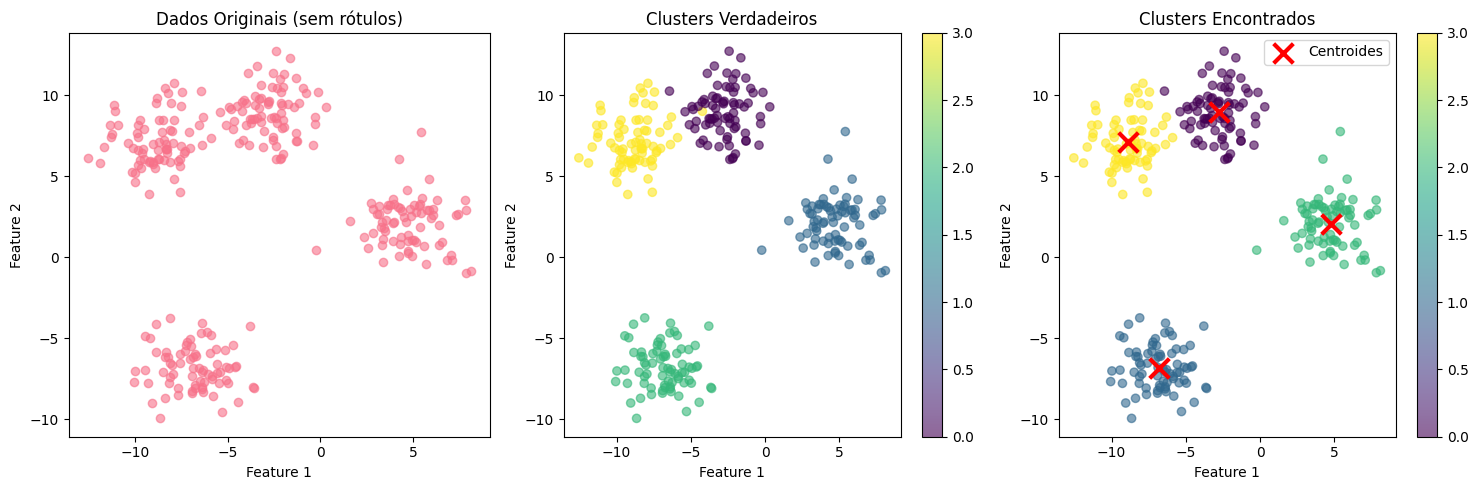

In [6]:
# Exemplo: Clustering com K-Means
# Gerando dados sintéticos
X_cluster, y_true = make_blobs(
    n_samples=300, centers=4, n_features=2, random_state=42, cluster_std=1.5
)

# Aplicando K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred_cluster = kmeans.fit_predict(X_cluster)

# Visualizando
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dados Originais (sem rótulos)")

plt.subplot(1, 3, 2)
scatter = plt.scatter(
    X_cluster[:, 0], X_cluster[:, 1], c=y_true, alpha=0.6, cmap="viridis"
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters Verdadeiros")
plt.colorbar(scatter)

plt.subplot(1, 3, 3)
scatter = plt.scatter(
    X_cluster[:, 0], X_cluster[:, 1], c=y_pred_cluster, alpha=0.6, cmap="viridis"
)
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c="red",
    marker="x",
    s=200,
    linewidths=3,
    label="Centroides",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters Encontrados")
plt.colorbar(scatter)
plt.legend()

plt.tight_layout()
plt.show()

### 2.3 Aprendizado por Reforço

- Aprende através de interação com ambiente
- Recebe recompensas/punições baseadas em ações
- Exemplos: jogos, robótica, sistemas de recomendação

_Nota: Este tipo não será coberto em detalhes neste curso, focando em supervisionado e não supervisionado._


## 3. Aplicações Práticas

### Exemplos do mundo real:

**Supervisionado:**

- Email spam detection (classificação)
- Previsão de preços de casas (regressão)
- Diagnóstico médico (classificação)
- Previsão de vendas (regressão)

**Não Supervisionado:**

- Segmentação de clientes (clustering)
- Detecção de anomalias
- Sistemas de recomendação
- Compressão de dados


## 4. Mini-Quiz

**Pergunta 1:** Qual tipo de aprendizado você usaria para prever o preço de uma casa baseado em suas características?

- a) Classificação
- b) Regressão
- c) Clustering

**Pergunta 2:** Para agrupar clientes com comportamentos similares sem conhecer grupos pré-definidos, você usaria:

- a) Aprendizado supervisionado
- b) Aprendizado não supervisionado
- c) Aprendizado por reforço

**Pergunta 3:** Qual é a principal diferença entre classificação e regressão?

- a) Quantidade de dados necessários
- b) Tipo de saída (categórica vs contínua)
- c) Complexidade do algoritmo


## Respostas do Quiz

1. **b) Regressão** - Preço é um valor contínuo
2. **b) Aprendizado não supervisionado** - Não temos rótulos pré-definidos
3. **b) Tipo de saída** - Classificação: categorias, Regressão: valores contínuos


## Próximos Passos

Na próxima lição, veremos:

- Fluxo completo de um projeto ML
- Preparação e exploração de dados
- Avaliação de modelos
- Boas práticas
